## Step 1: Reading and Understanding the Data

In [930]:
import warnings
warnings.filterwarnings('ignore')

In [931]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [932]:
# Read the data from csv file
bike_df = pd.read_csv('day.csv')

In [933]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [934]:
bike_df.shape

(730, 16)

In [935]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [936]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### There are no missingvalues and has 730 rows and 16 columns

## Step 2: Cleaning the data

### Drop the columns that are not useful

In [937]:
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [938]:
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [939]:
# renaming few columns for better readibility
bike_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [940]:
# Copying the dataframe into new
bike_df_copy = bike_df.copy()

In [941]:
# dropping the duplicates
bike_df_copy.drop_duplicates(inplace=True)

In [942]:
bike_df_copy.shape

(730, 12)

### There are no duplicate values

In [943]:
bike_df_copy.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

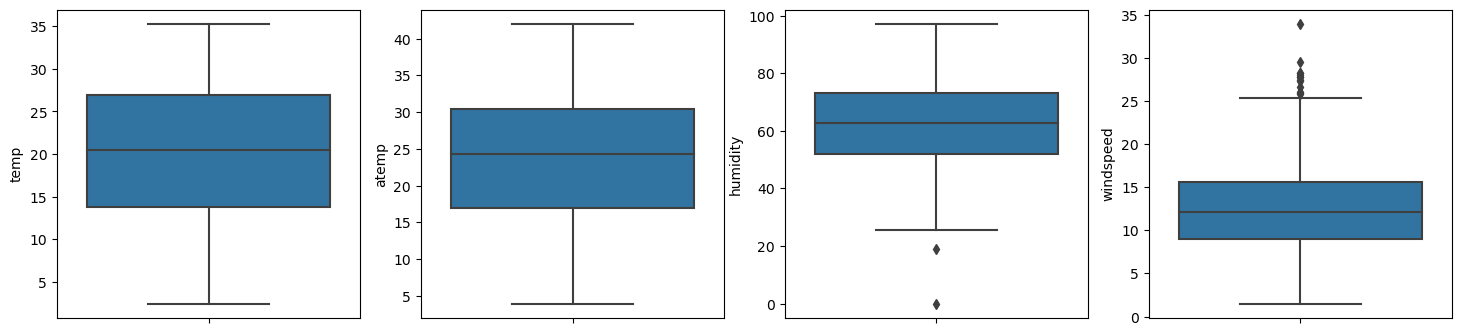

In [944]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df_copy)
    i+=1

In [945]:
bike_df['humidity'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95])

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
5%        40.741735
10%       45.000000
25%       52.000000
50%       62.625000
75%       72.989575
90%       81.762500
95%       86.868735
max       97.250000
Name: humidity, dtype: float64

In [946]:
bike_df['windspeed'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95])

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
5%         5.326052
10%        6.704754
25%        9.041650
50%       12.125325
75%       15.625589
90%       19.833997
95%       22.999988
max       34.000021
Name: windspeed, dtype: float64

## There are no outliers

In [947]:
bike_df.shape

(730, 12)

In [948]:
## 

In [949]:
# Encoding/mapping the season, month, weekday, weathersit columns

bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bike_df.month = bike_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

bike_df.weekday =bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [950]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [951]:
# check the column info of the dataset

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 3: Exploratory Data Analysis

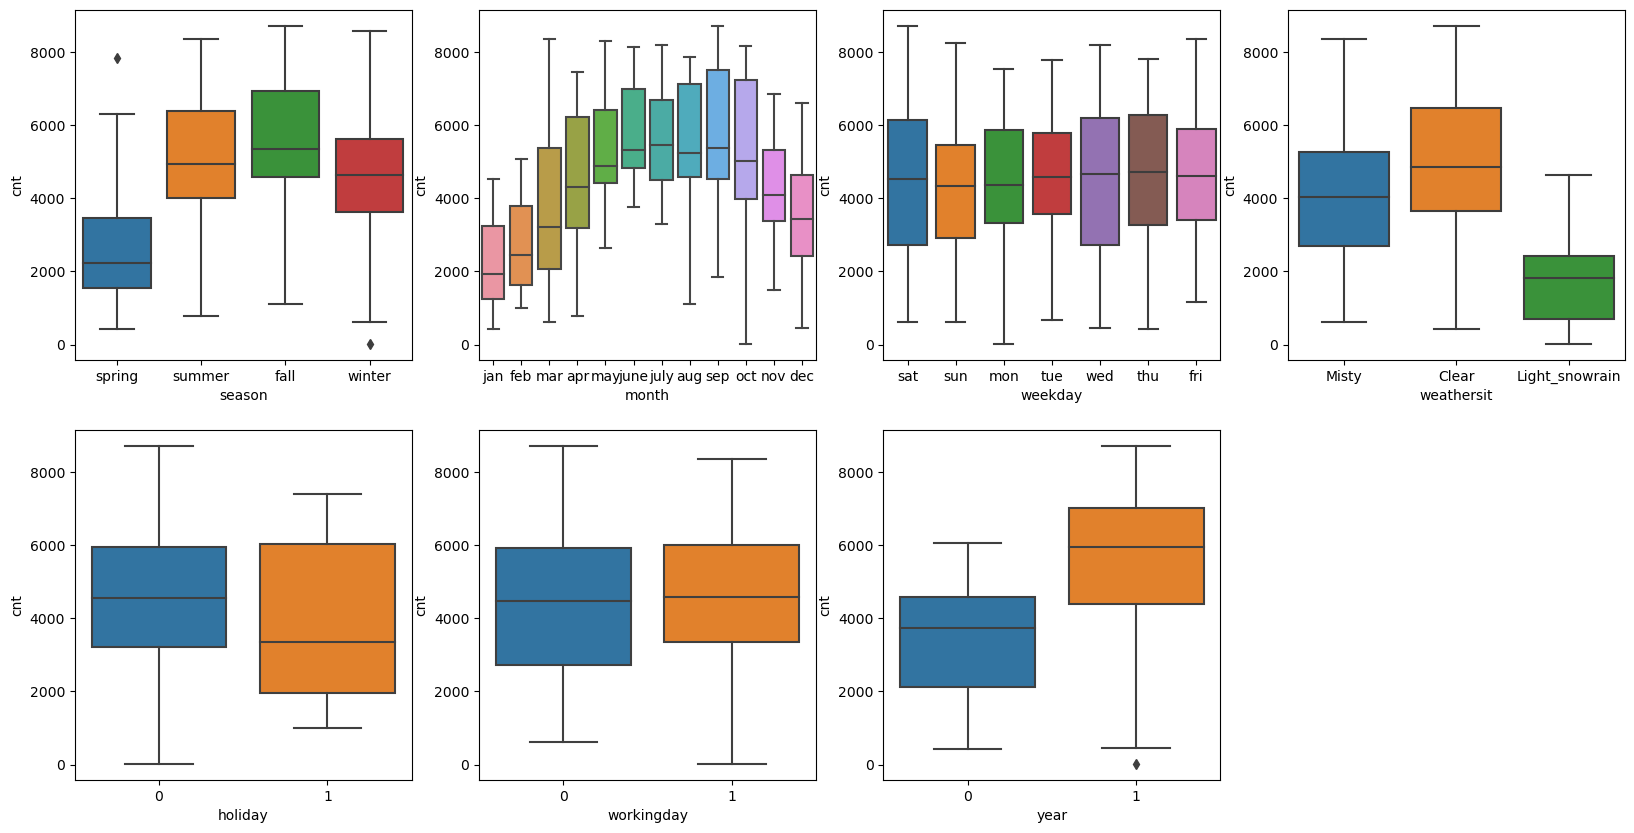

In [952]:
plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_df)
plt.show()

### Season

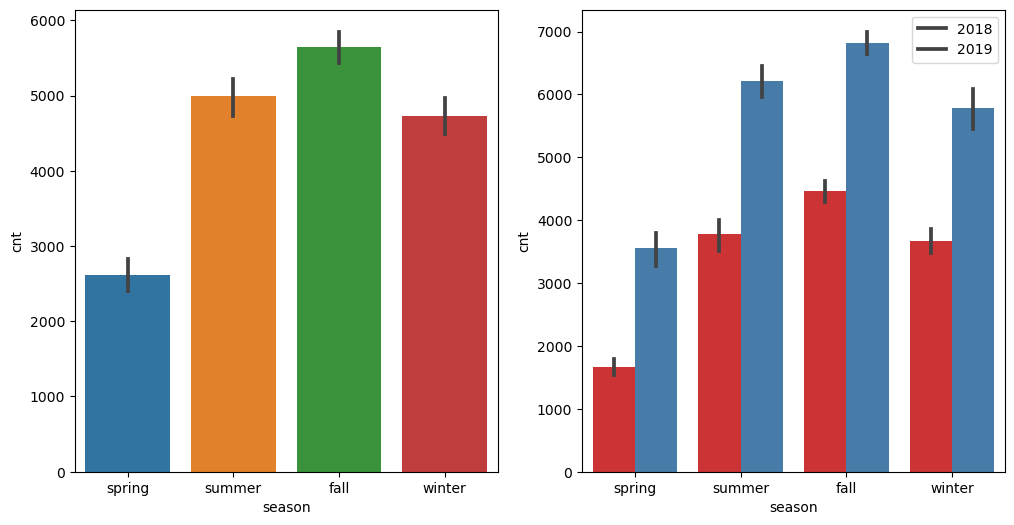

In [953]:
def subplots(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column, y='cnt', data=bike_df)
    plt.subplot(1,2,2)
    sns.barplot(x=column, y='cnt', data=bike_df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()
subplots("season")

### It can be observed that Spring has least bike rentals while Fall has the highest bike rentals

### month

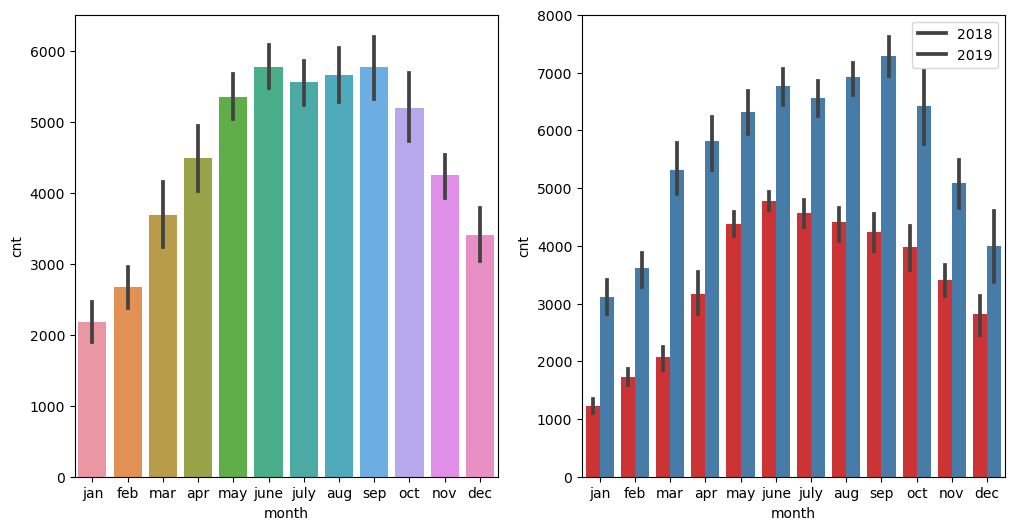

In [954]:
subplots("month")

### It can be observed that the months from May to October have shown a strong demand for bike rentals.

### weathersit

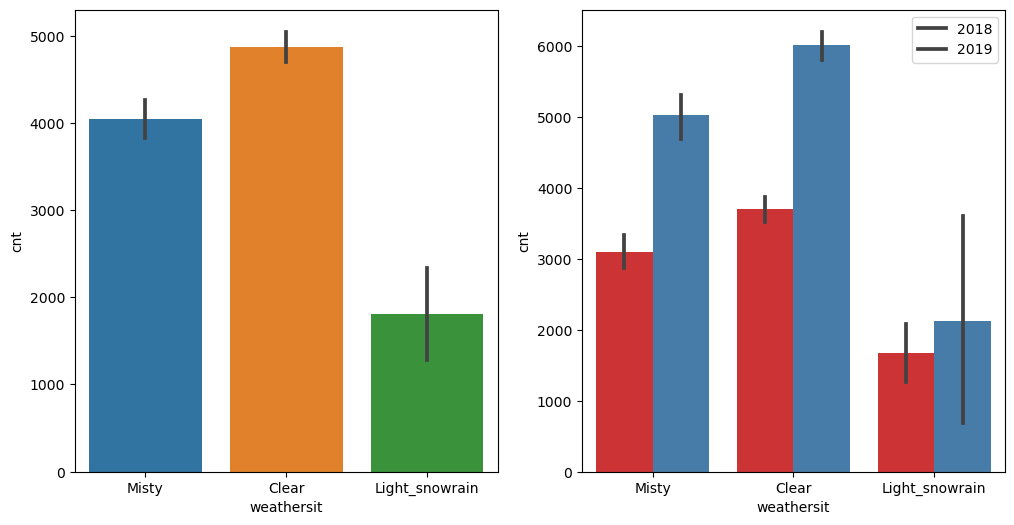

In [955]:
subplots('weathersit')

### year

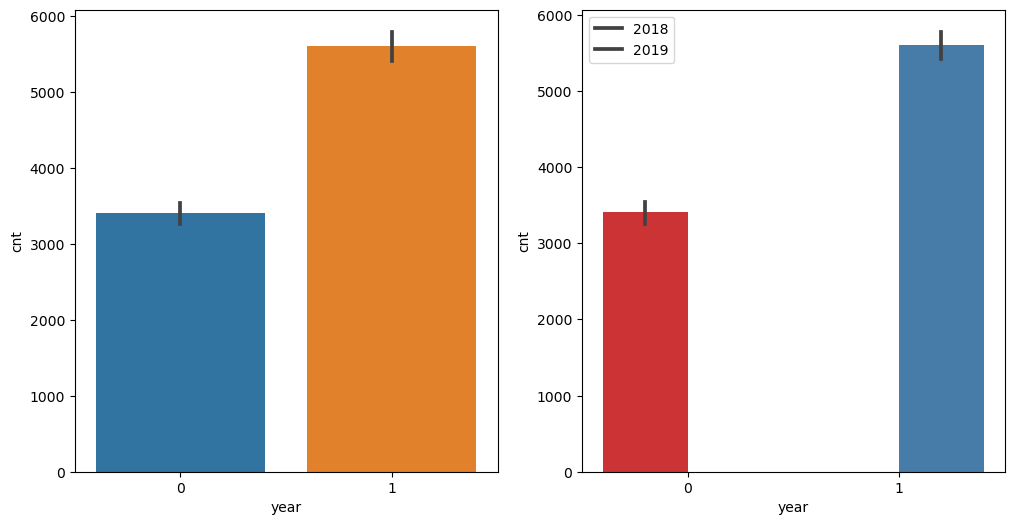

In [956]:
subplots('year')

### Demand has significantly increased from 2018 to 2019.

In [957]:
# Checking Correlation
bike_df.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
year,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


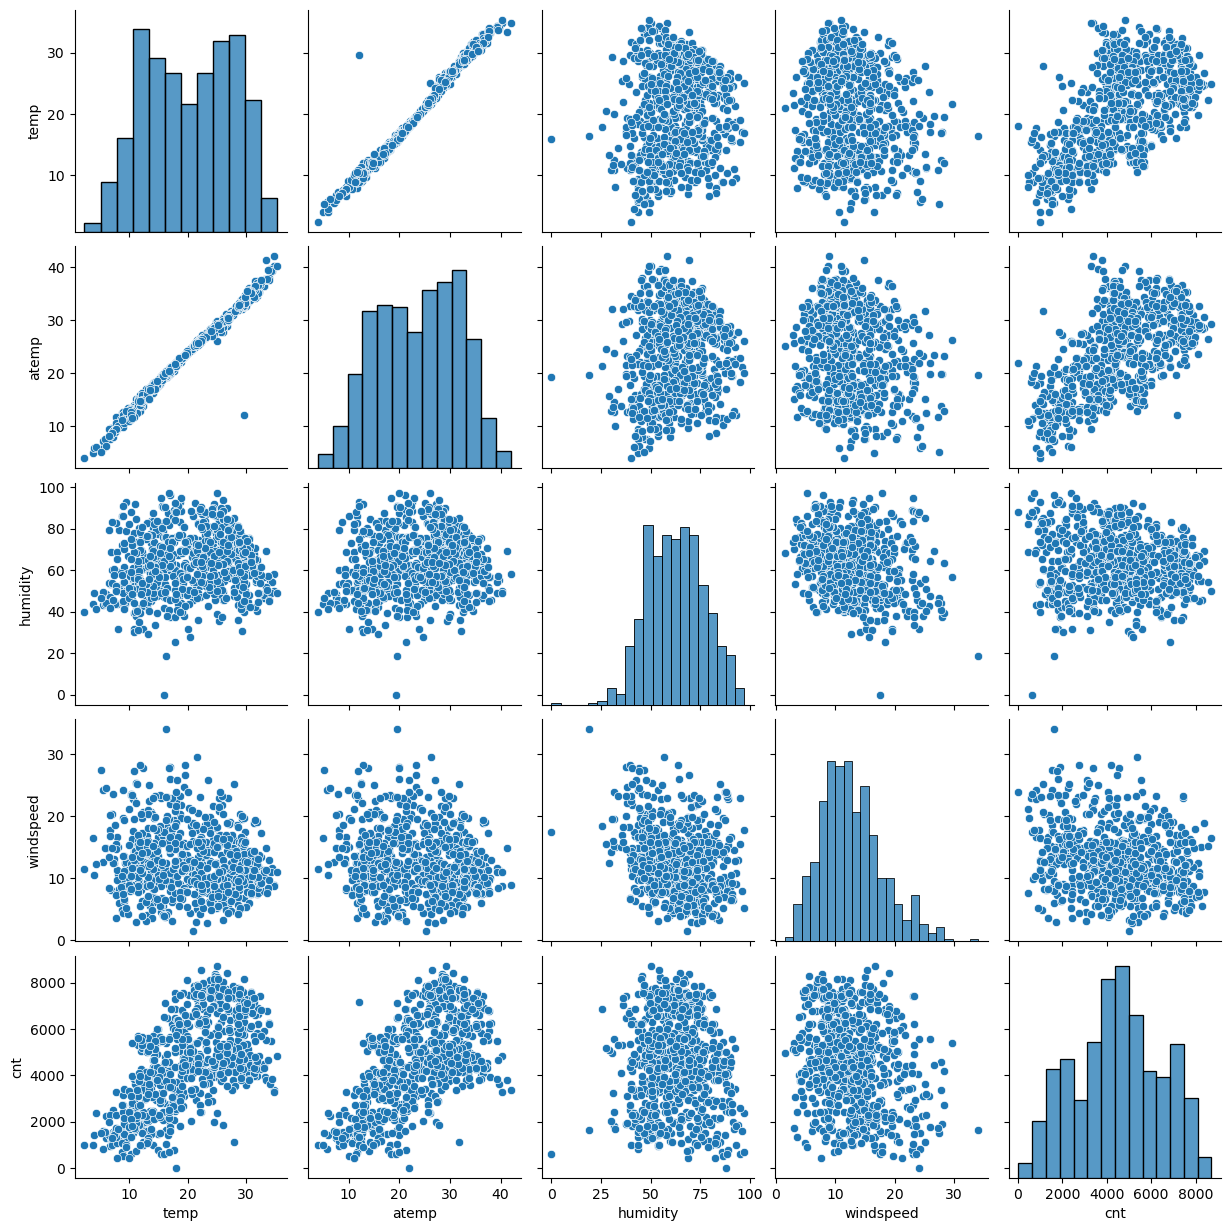

In [958]:
sns.pairplot(data=bike_df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

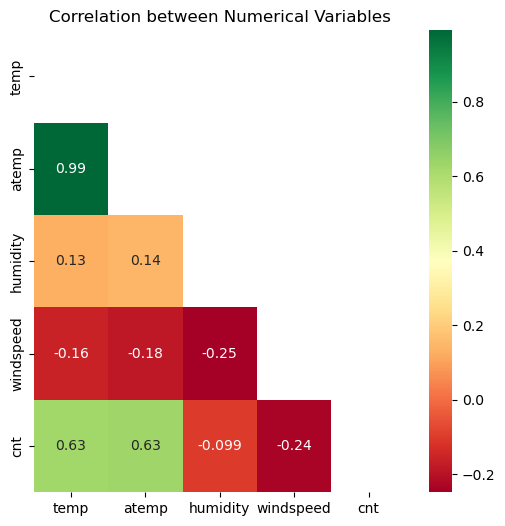

In [959]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike_df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bike_df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

### We can see that there is multicolinearity between the features "temp" and "atemp". So one of the feature is not required.

In [960]:
# Dropping the atemp column as it is highly correlated to temp
bike_df.drop('atemp',axis=1,inplace=True)

## Step 4: Feature Engineering

In [961]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike_df.month,drop_first=True)
weekdays_df=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_df.season,drop_first=True)

In [962]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [963]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([bike_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [964]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [965]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   humidity        730 non-null    float64
 9   windspeed       730 non-null    float64
 10  cnt             730 non-null    int64  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

In [966]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [967]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [968]:
# check the shape of new dataframe

df_new.shape

(730, 29)

In [969]:
# check the column info of new dataframe 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   humidity        730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   aug             730 non-null    uint8  
 8   dec             730 non-null    uint8  
 9   feb             730 non-null    uint8  
 10  jan             730 non-null    uint8  
 11  july            730 non-null    uint8  
 12  june            730 non-null    uint8  
 13  mar             730 non-null    uint8  
 14  may             730 non-null    uint8  
 15  nov             730 non-null    uint8  
 16  oct             730 non-null    uint8  
 17  sep             730 non-null    uin

## Splitting the data into train and test

In [970]:
bike_df=df_new

#y to contain only target variable
y=bike_df.pop('cnt')

#X is all remaining variable also our independent variables
X=bike_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [971]:
X.head()

,year,holiday,workingday,temp,humidity,windspeed,aug,dec,feb,jan,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [972]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 28)
(219, 28)


In [973]:
# Let us scale continuous variables
num_vars = ['temp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [974]:
X_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,aug,dec,feb,jan,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.654174,0.414873,0.074364,0.074364,0.074364,0.088063,...,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.346380,0.230920,0.258317,0.250489
std,0.500067,0.163398,0.470935,0.227231,0.143648,0.185619,0.262619,0.262619,0.262619,0.283664,...,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.476282,0.421834,0.438138,0.433719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.756977,0.526481,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [975]:
X_train.head()

,year,holiday,workingday,temp,humidity,windspeed,aug,dec,feb,jan,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
683,1,0,1,0.327133,0.639330,0.327101,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
645,1,1,0,0.403972,0.731215,0.419004,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.785745,0.415925,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
640,1,0,1,0.745598,0.817947,0.110593,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


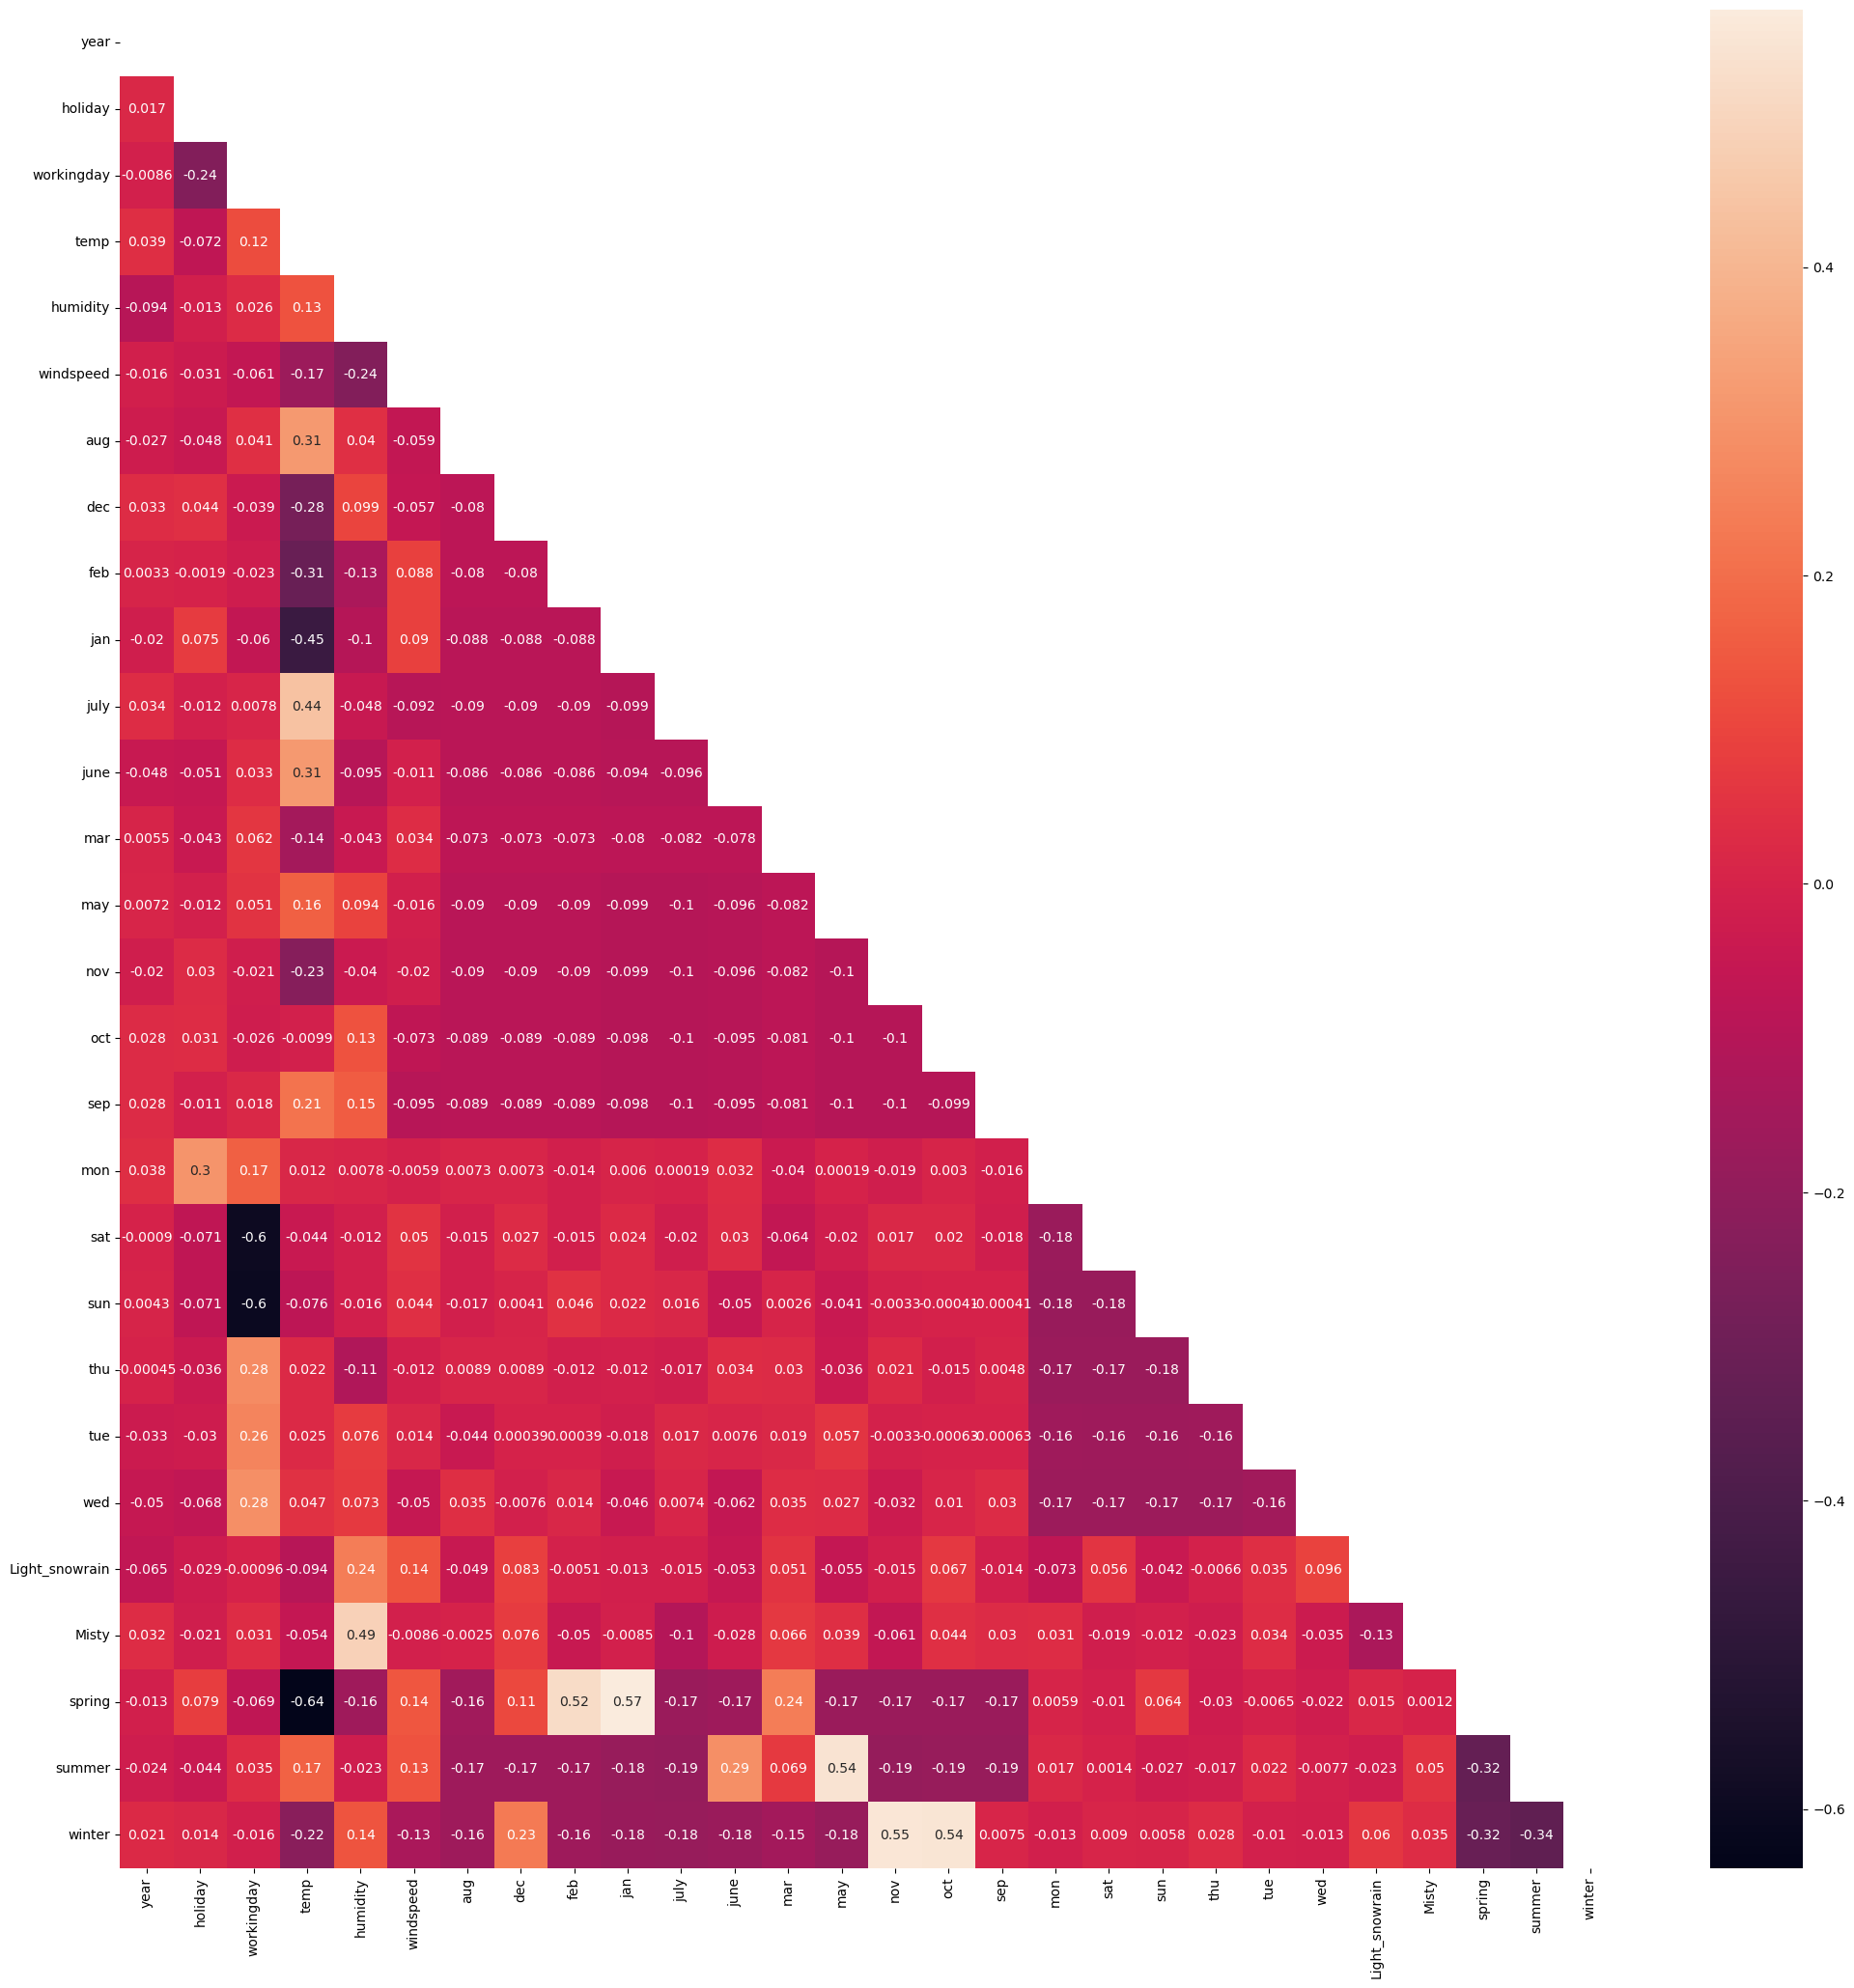

In [976]:
plt.figure(figsize = (25,25))
matrix = np.triu(X_train.corr())
sns.heatmap(X_train.corr(), annot = True, mask=matrix)
plt.show()

## Step 5: Model Building using RFE

In [977]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [978]:
#Cut down number of features to 15 using automated approach
num_features_to_select = 15

rfe = RFE(estimator=lr, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [979]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 6),
 ('dec', True, 1),
 ('feb', False, 13),
 ('jan', False, 8),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 3),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 5),
 ('sep', False, 2),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 7),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1)]

In [980]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [981]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [982]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'dec',
       'july', 'nov', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')

In [983]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['aug', 'feb', 'jan', 'june', 'mar', 'may', 'oct', 'sep', 'mon', 'thu',
       'tue', 'wed', 'summer'],
      dtype='object')

In [984]:
# Taking 15 columns supported by RFE for regression
X_train_1 = X_train[['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'dec',
       'july', 'nov', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter']]

In [985]:
X_train_1.shape

(511, 15)

### Building model using statsmodel

### Model 1

In [986]:
#Selected columns for Model 1 - all columns selected by RFE
cols =['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'dec',
       'july', 'nov', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          2.22e-185
Time:                        12:52:37   Log-Likelihood:                -4128.3
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     496   BIC:                             8350.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2452.4975    244.991     10.

## Model 2

In [987]:
#Drop the column "workingday"
#Selected columns for Model 1 - all columns selected by RFE
cols =['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec',
       'july', 'nov', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          2.22e-185
Time:                        12:52:37   Log-Likelihood:                -4128.3
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     496   BIC:                             8350.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3308.2705    303.136     10.

## Model 3

In [988]:
#Drop the column "humidity"
#Selected columns for Model 1 - all columns selected by RFE
cols =['year', 'holiday', 'temp', 'windspeed', 'dec',
       'july', 'nov', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.14e-183
Time:                        12:52:37   Log-Likelihood:                -4135.1
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     497   BIC:                             8358.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2605.9522    237.679     10.

### Model 4

In [989]:
# We can drop sat variable as it has high p-value
cols =['year', 'holiday', 'temp', 'windspeed', 'dec',
       'july', 'nov', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          8.36e-185
Time:                        12:52:37   Log-Likelihood:                -4135.2
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     498   BIC:                             8352.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2616.9770    235.736     11.

### We can cosider the above model 4, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.F-Statistics value of 207.2 (which is greater than 1) and the p-value of 8.36e-185 i.e almost equals to zero, states that the overall model is significant

In [990]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [991]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

2616.9770122682003 [ 2016.82018536  -708.09257721  3436.11217839  -834.70644493
  -637.16987273  -521.95516186  -751.28512321  -353.99171294
 -2245.95860981  -685.80972616 -1295.18477971   718.75869687]


## Step 6: Residual Analysis

In [992]:
y_train_pred = lr.predict(X_train[cols])

In [993]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

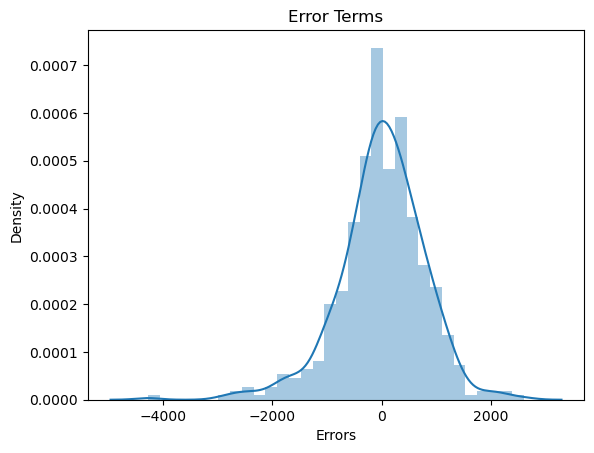

In [994]:
plot_res_dist(y_train, y_train_pred)

### Multi Colinearity

In [995]:
get_vif(cols)

          Features   VIF
3        windspeed  5.05
2             temp  5.01
11          winter  2.38
0             year  2.09
6              nov  1.77
10          spring  1.75
9            Misty  1.56
5             july  1.37
4              dec  1.31
7              sun  1.19
8   Light_snowrain  1.10
1          holiday  1.05


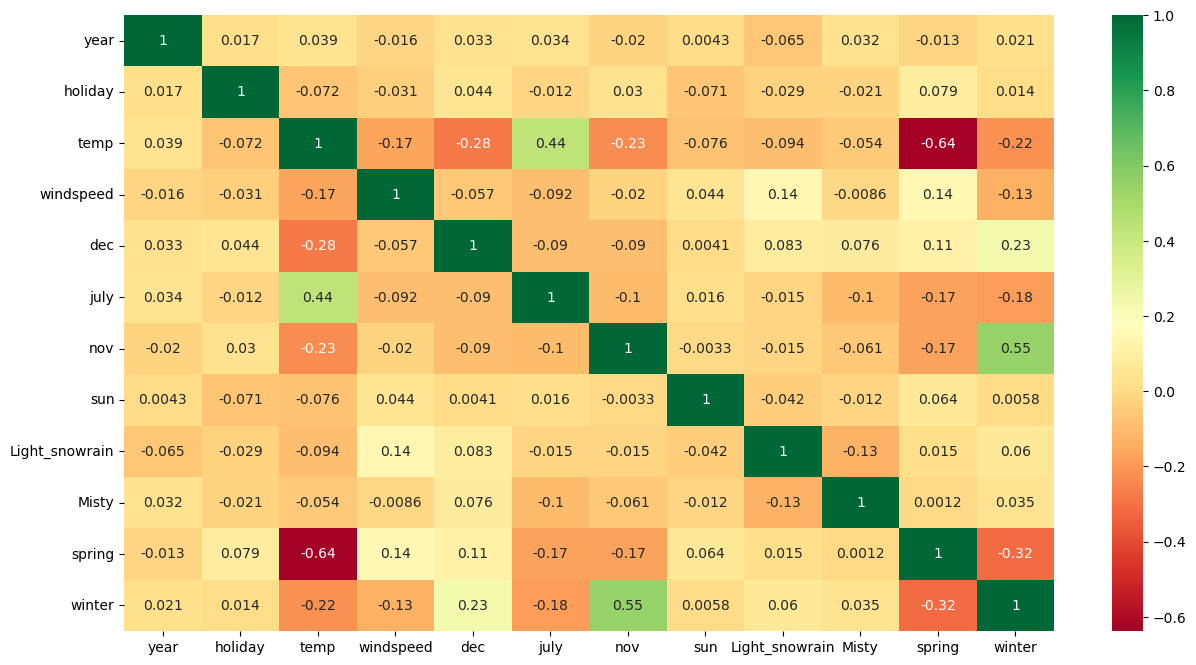

In [996]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train[cols].corr(),annot = True, cmap="RdYlGn")
plt.show()

### We don't see any multicolinearity

### Homoscedasticity

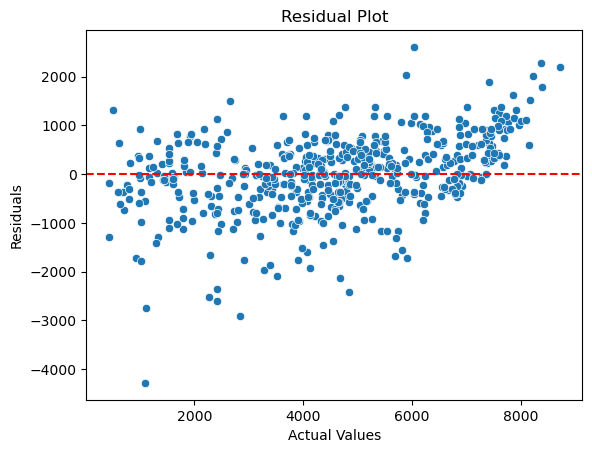

In [997]:
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.axhline(0, color='red', linestyle='--')  
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### No visible pattern observed from above plot for residuals.

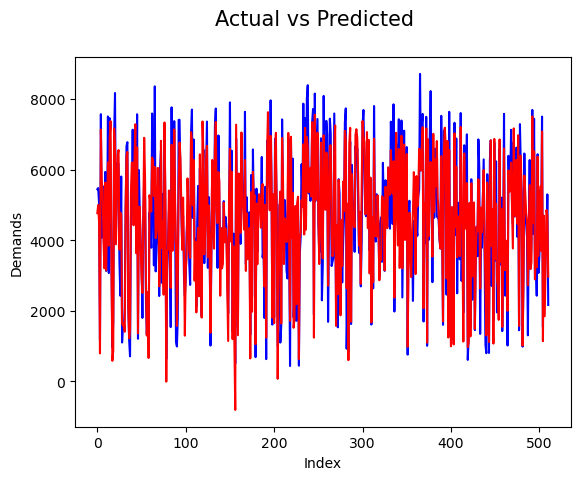

In [998]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Model Predictions

### R-Squared value for train predictions

In [999]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8331040969440414

In [1000]:
#Scale variables in X_test
num_vars = ['temp','humidity','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [1001]:
cols = ['year', 'holiday', 'temp', 'windspeed', 'dec',
       'july', 'nov', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols])

## R-Squared value for test predictions

In [1002]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.829004094832976

## Step 7: Model Evaluation

In [1003]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.829004094832976

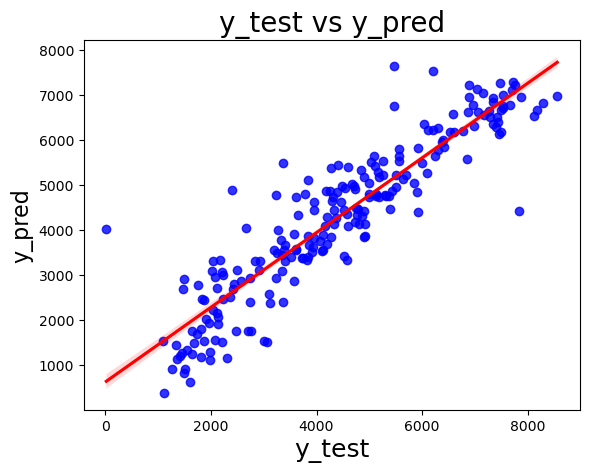

In [1004]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [1005]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['year', 'holiday', 'temp', 'windspeed', 'dec',
       'july', 'nov', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          8.36e-185
Time:                        12:52:39   Log-Likelihood:                -4135.2
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     498   BIC:                             8352.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2616.9770    235.736     11.

In [1006]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.829

In [1007]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8038


# Summary: Significant Variables for Predicting Shared Bike Demand

The analysis of shared bike demand indicates that the following variables have a significant impact on predicting the demand:

1. **Holiday:**
   - Presence of a holiday affects shared bike demand.

2. **Year:**
   - The year of observation plays a role in predicting bike demand. Significant Increase in Demand from 2018 to 2019

3. **Temperature (temp):**
   - The temperature has a noticeable impact on shared bike usage.

4. **Wind Speed (windspeed):**
   - Wind speed is a factor influencing the demand for shared bikes.

5. **Season:**
   - Different seasons affect bike usage differently.

6. **Months (July, November, December):**
   - Specific months, such as July, November, and December, show significance in predicting demand.

7. **Day of the Week (Sunday):**
   - The day of the week, specifically Sunday, plays a role in bike demand.

8. **Weather Situation (weathersit):**
   - Certain weather conditions, like Light Snow, Mist, Spring, and Winter, are significant predictors.

These variables can be considered important features when building a predictive model for shared bike demand.